In [1]:
import numpy as np
from sympy import symbols, diff, nsolve, Symbol, log
import matplotlib.pyplot as plt
import seaborn as sns

# Exerxise 2

Trond Hauklien
TKJ4215 Statistical Thermodynamics in Chemistry and Biology
Date: 07.02.2023

### Task 1

In [2]:
x, y, l = symbols("x, y, l")


def finding_equations(f, g):
    """
    Given the function f and the constraint fucntion g, it returns a list of equations for which the system of equations is going to be solved.
    """
    equations = []

    for s in f.atoms(Symbol):
        equations.append(diff(f, s) - l * diff(g, s))

    equations.append(g)
    return equations

In [3]:
f = x**2 + y
g = x - y

result = nsolve(finding_equations(f, g), [x, y, l], [1, 1, 1])
print(
    f"For f(x, y) = x**2 + y, g(x, y) = x - y = 0 we get \nx = {result[0]:.2}, y = {result[1]:.2} and l = {result[2]:.2}."
)

For f(x, y) = x**2 + y, g(x, y) = x - y = 0 we get 
x = -0.50, y = -0.50 and l = -1.0.


In [4]:
f = x**2 - 8 * x + y**2 - 12 * y + 48
g = x + y - 8

result = nsolve(finding_equations(f, g), [x, y, l], [1, 1, 1])
print(
    f"For f(x, y) = x**2 - 8 * x + y**2 - 12 * y + 48, g(x, y) = x + y - 8 = 0 we get \nx = {result[0]:.2}, y = {result[1]:.2} and l = {result[2]:.2}."
)

For f(x, y) = x**2 - 8 * x + y**2 - 12 * y + 48, g(x, y) = x + y - 8 = 0 we get 
x = 3.0, y = 5.0 and l = -2.0.


By solving the system of equations we get that
$$

\begin{align*}
  x &= 3 \\
  y &= 5 \\
  \lambda &= -2 
\end{align*}

$$

### Task 2

In [5]:
def dist_n_dice(n):
    """Give the probability distribution of the sum of n-sided dice."""
    variables = [Symbol(f"p_{i}") for i in range(1, n + 1)]
    f = -sum([p_n * log(p_n) for p_n in variables])
    g = sum(variables) - 1

    eqs = finding_equations(f, g)
    variables.append(l)

    result = nsolve(eqs, variables, [1 / n] * (n + 1))
    return result


dice_dist = []
for n in range(1, 20):
    dice_dist.append(dist_n_dice(n)[0])

print(dice_dist)

x, y = symbols("x, y")
x, y = Symbol("x"), Symbol("x")

[1.00000000000000, 0.500000000000000, 0.333333333333333, 0.250000000000000, 0.200000000000000, 0.166666666666667, 0.142857142857143, 0.125000000000000, 0.111111111111111, 0.100000000000000, 0.0909090909090909, 0.0833333333333333, 0.0769230769230769, 0.0714285714285714, 0.0666666666666667, 0.0625000000000000, 0.0588235294117647, 0.0555555555555556, 0.0526315789473684]


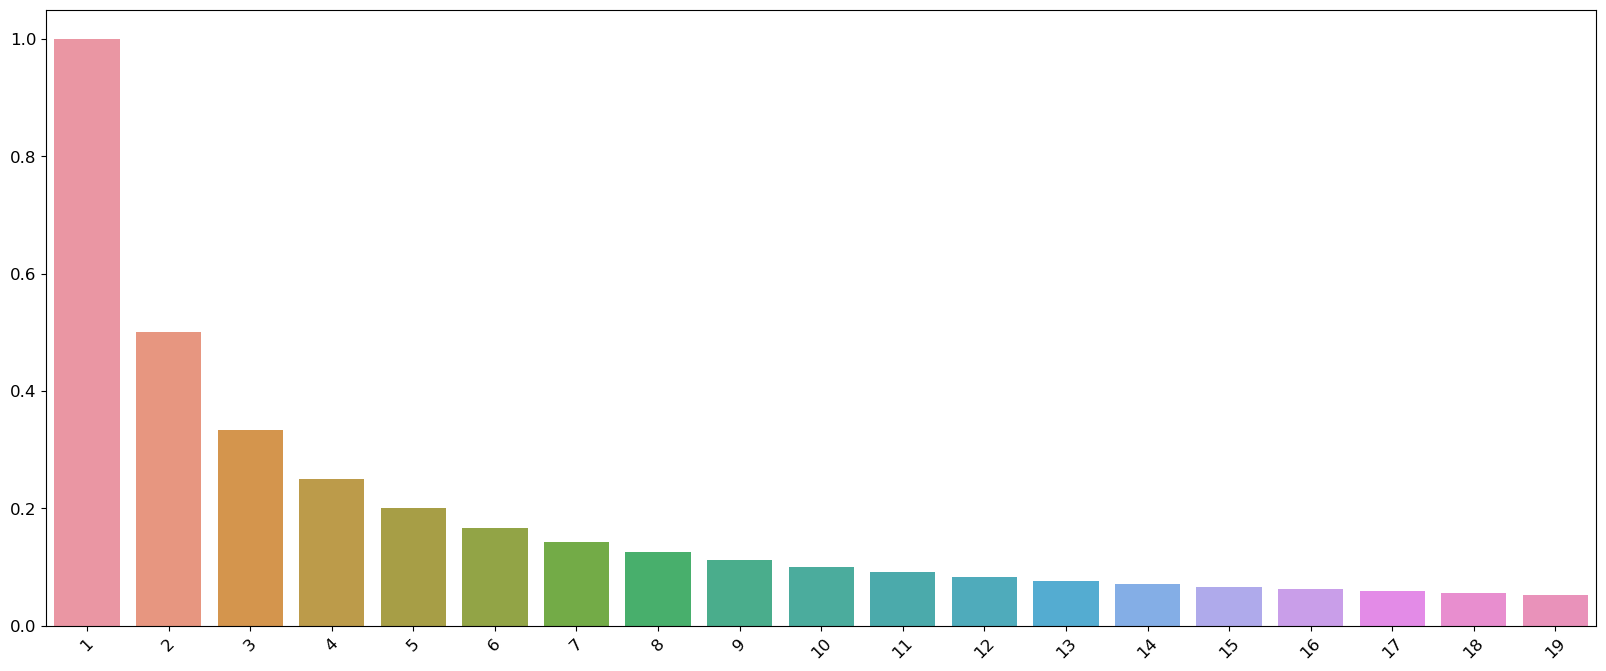

In [6]:
plt.figure(figsize=(20,8))
sns.barplot(x=list(range(1,20)), y=dice_dist)
plt.yticks(size = 12)
plt.xticks(rotation=45, size = 12)
plt.show()

Vi får en geometrisk fordeling.